# Notebook

## Imports

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import plotly.express as px
import matplotlib
import time
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')
import statsmodels.api as sm
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
from scipy import stats
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Análises

In [4]:
print(f'São {train.shape[0]} observações para {train.shape[1]} variáveis de treino')

São 1460 observações para 81 variáveis de treino


In [5]:
train['flag'] = 'train'
test ['flag'] = 'test'

In [6]:
df = pd.concat([train,test])

In [7]:
df.loc[df['flag'] == 'train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.loc[df['flag'] == 'train'].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,flag
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


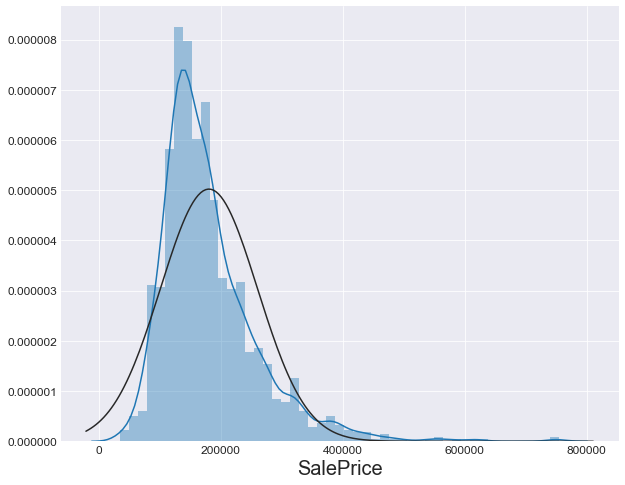

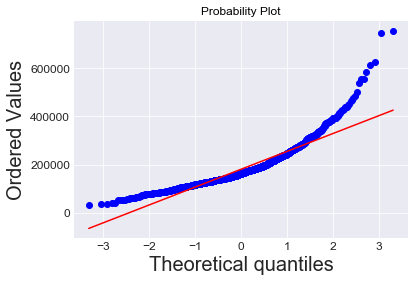

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['flag'] == 'train'].SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(df.loc[df['flag'] == 'train'].SalePrice, plot=plt)

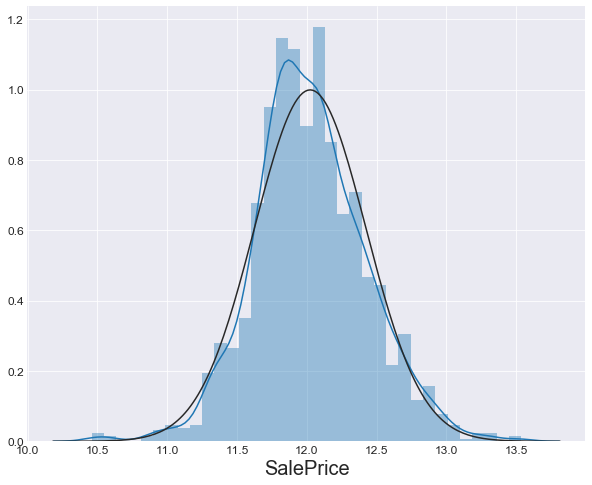

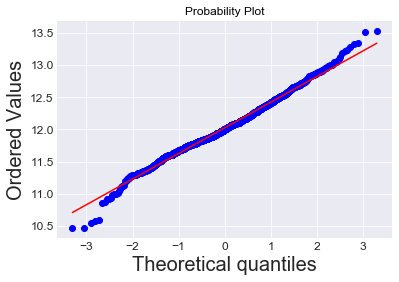

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(df.loc[df['flag'] == 'train'].SalePrice), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df.loc[df['flag'] == 'train'].SalePrice), plot=plt)

In [11]:
df.loc[df['flag'] == 'train'].MSZoning.value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
def plot_box (df,hue,variavel):    
    plt.figure(figsize=(10,8))
    sns.boxplot(x=variavel, y=hue, data=df)

In [13]:
def plot_scatter(df,hue,variavel):    
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=variavel, y=hue, data=df)

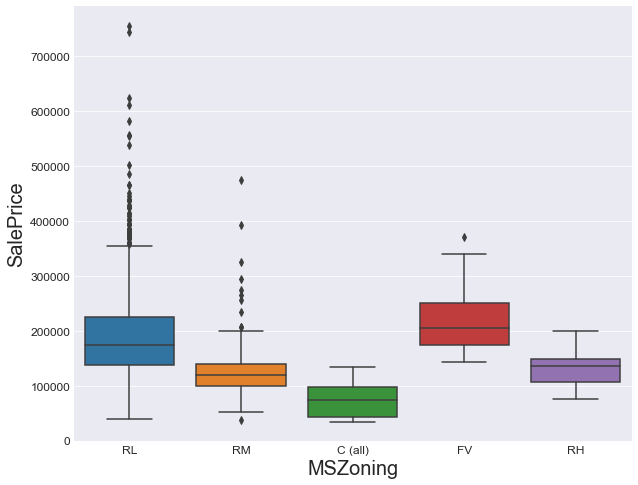

In [14]:
plot_box(df.loc[df['flag'] == 'train'],"SalePrice","MSZoning")

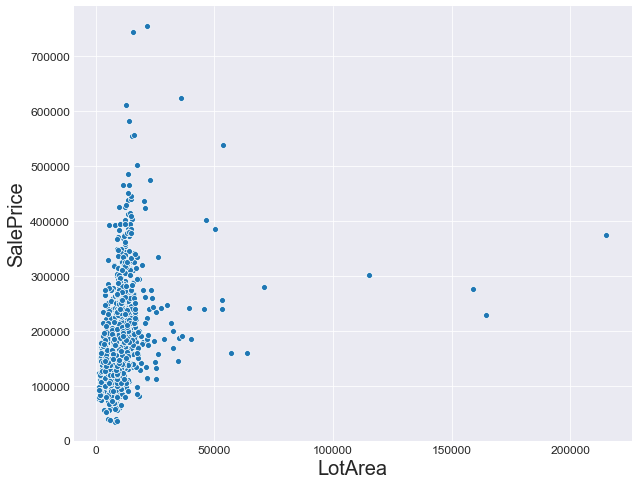

In [15]:
plot_scatter(df.loc[df['flag'] == 'train'],"SalePrice","LotArea")

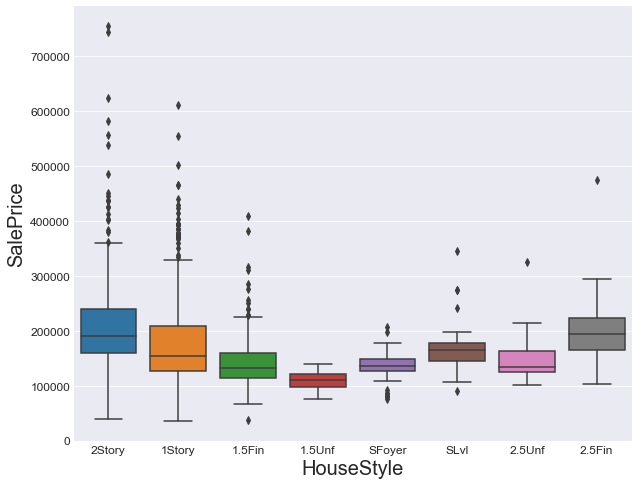

In [16]:
plot_box(df.loc[df['flag'] == 'train'],"SalePrice","HouseStyle")

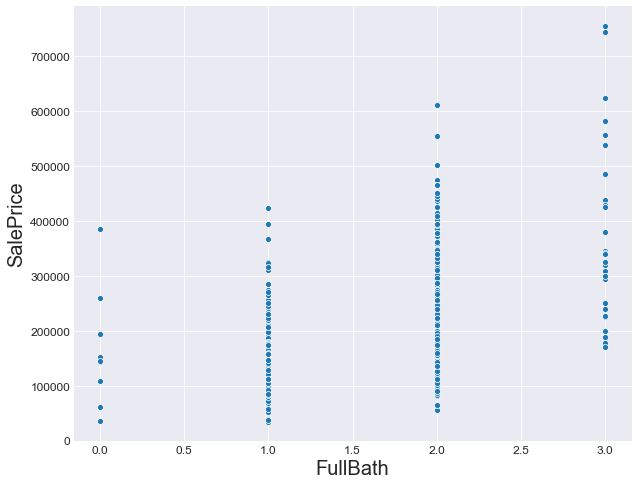

In [17]:
plot_scatter(df.loc[df['flag'] == 'train'],"SalePrice","FullBath")

In [18]:
df.loc[df['flag'] == 'train'].OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

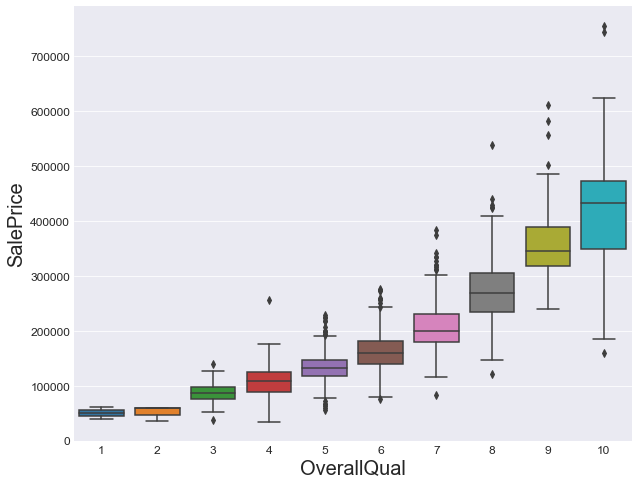

In [19]:
plot_box(df.loc[df['flag'] == 'train'],"SalePrice","OverallQual")

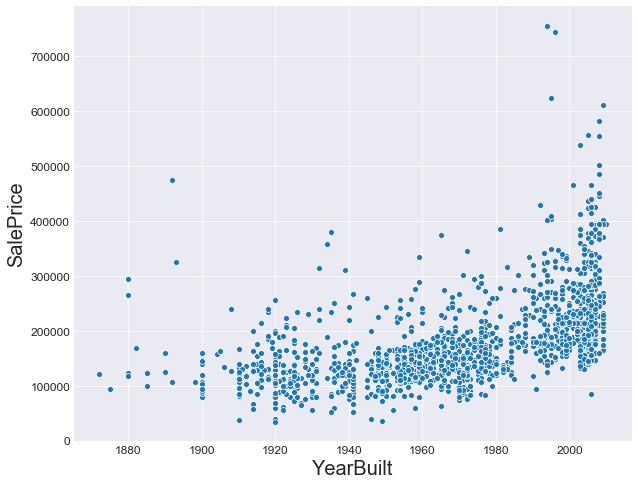

In [20]:
plot_scatter(df.loc[df['flag'] == 'train'],"SalePrice",'YearBuilt')

### Olhando as correlações e descrições das variáveis

In [21]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Vamos tirar as variáveis que tem menos de 15% de preenchimento, e aparentemente não tem um fator tão decisivo nos preços e decisões de compra das casas

In [22]:
df_clean = df.drop(columns=['Alley','GarageYrBlt','GarageCars',"FireplaceQu",'KitchenAbvGr','TotRmsAbvGrd','TotalBsmtSF',"Alley","PoolQC","Fence","MiscFeature" ]).copy()

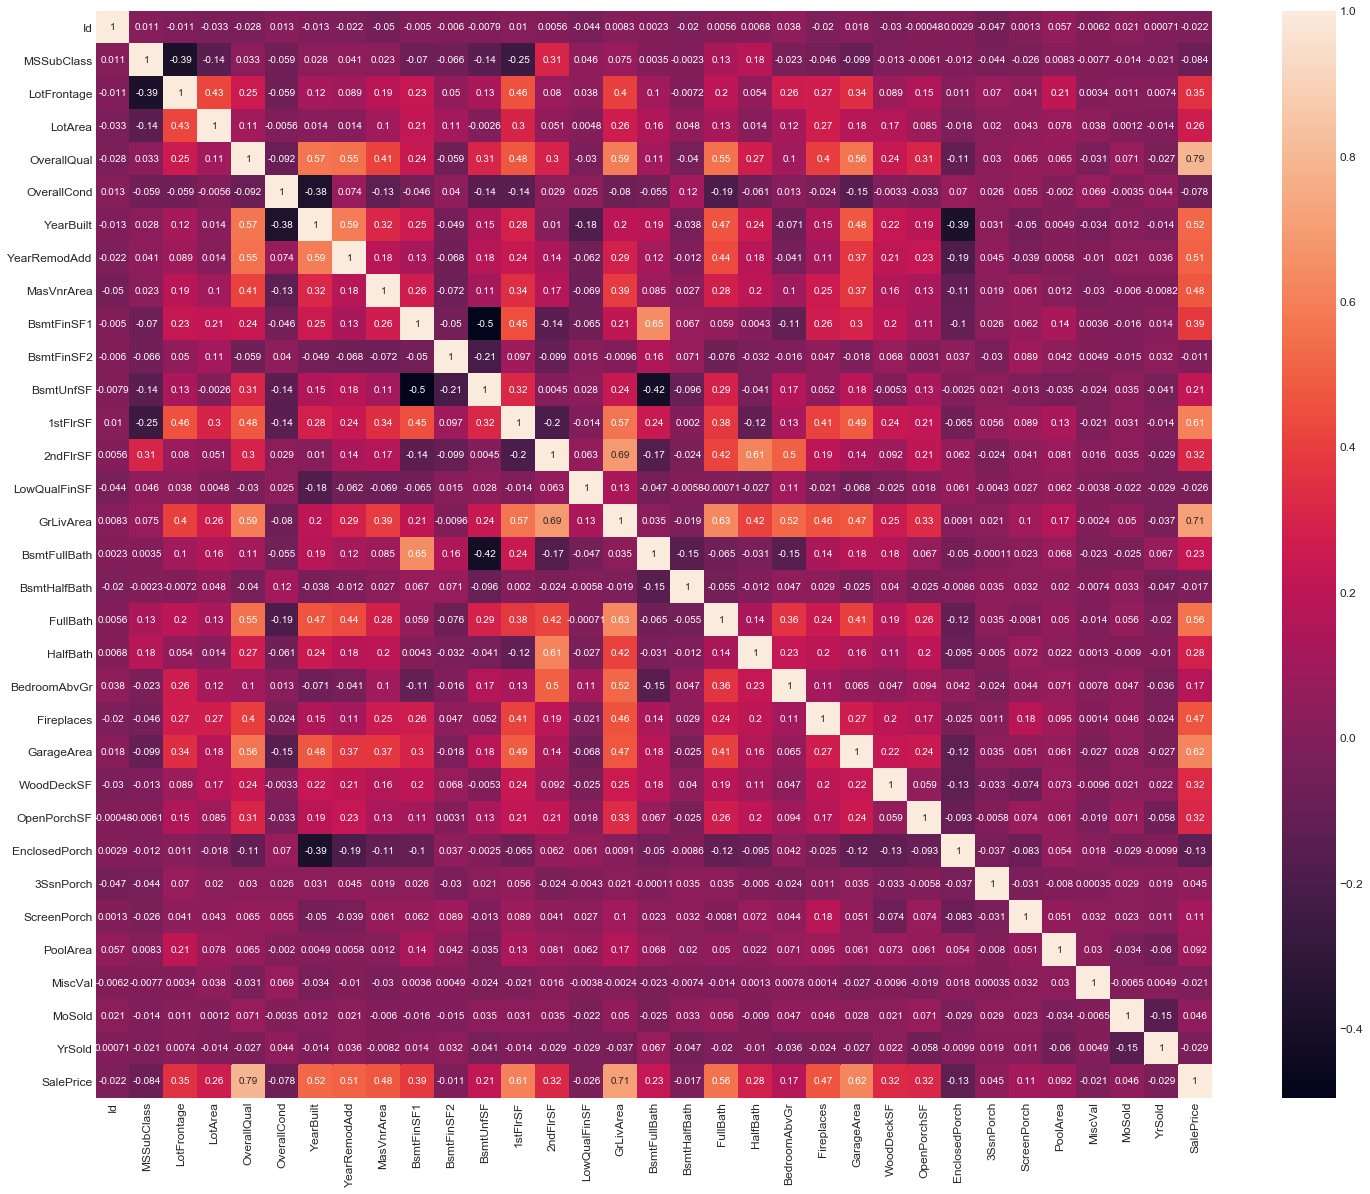

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(df_clean.loc[df_clean['flag'] == 'train'].corr(), annot=True)


### Variáveis Categóricas

In [24]:
col_cat = ['MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition',
'SalePrice']


In [25]:
df_clean[col_cat]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal,NaN
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml,NaN
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,NaN
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal,NaN


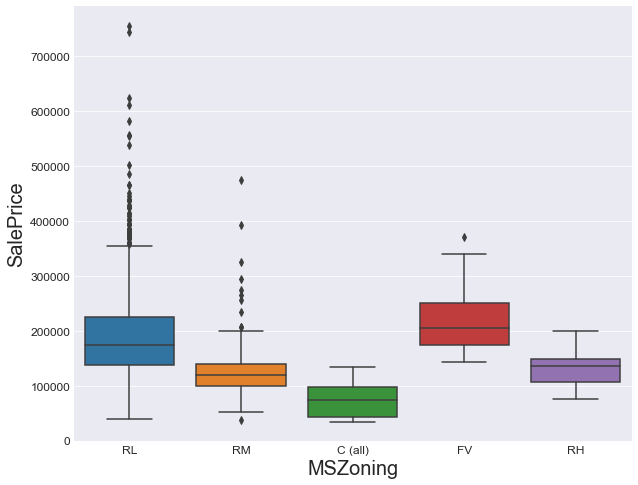

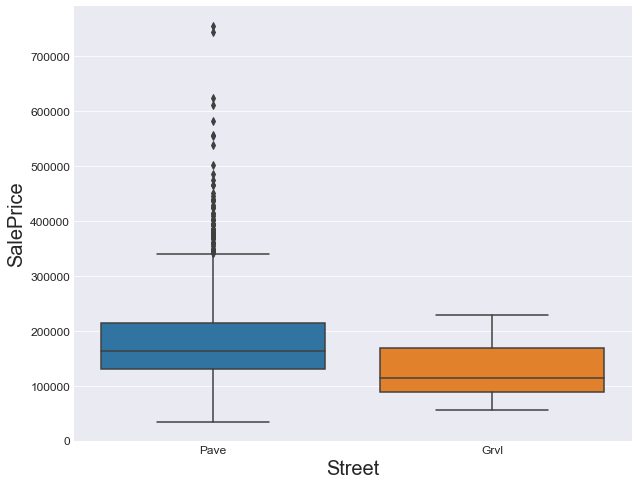

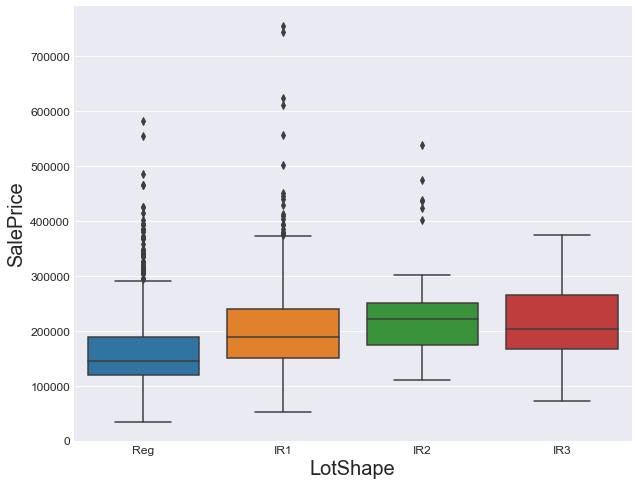

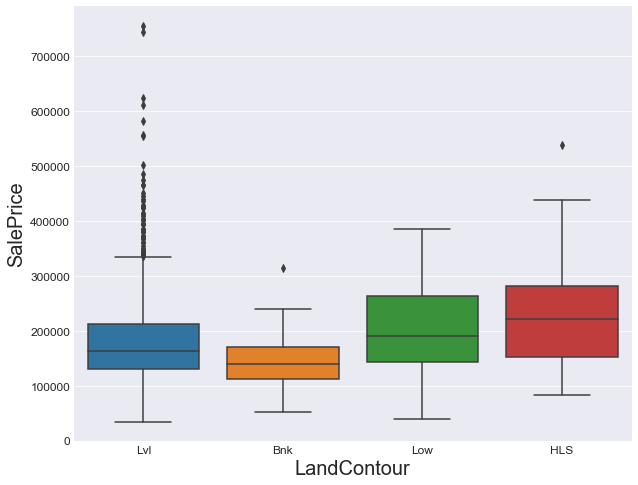

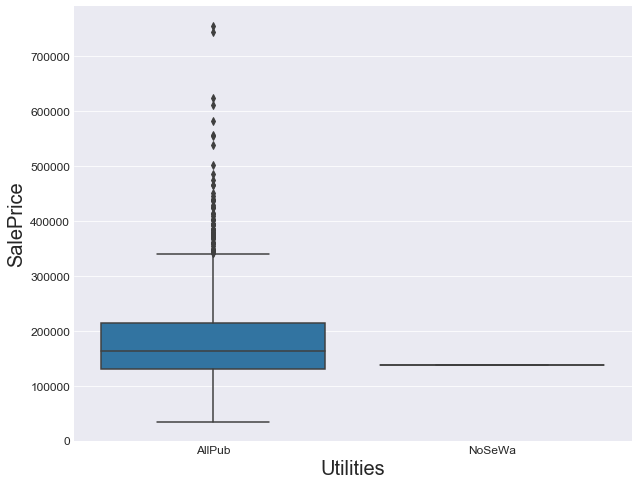

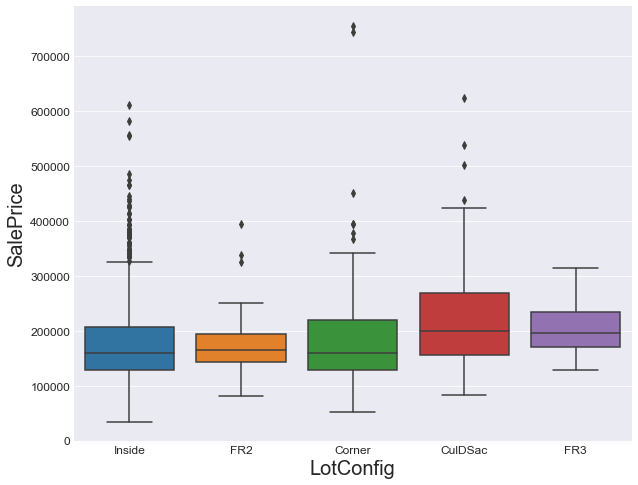

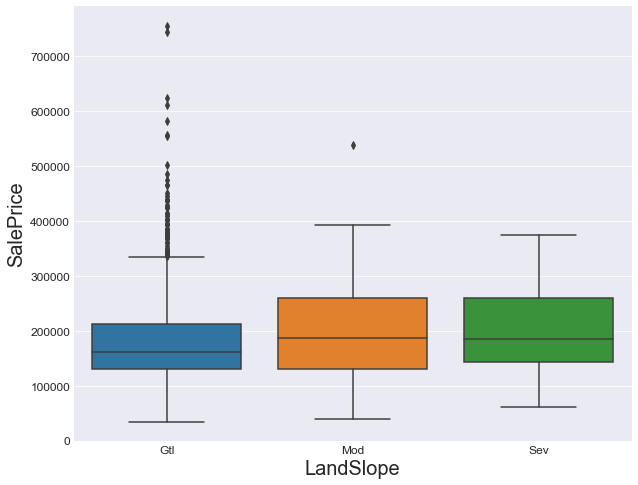

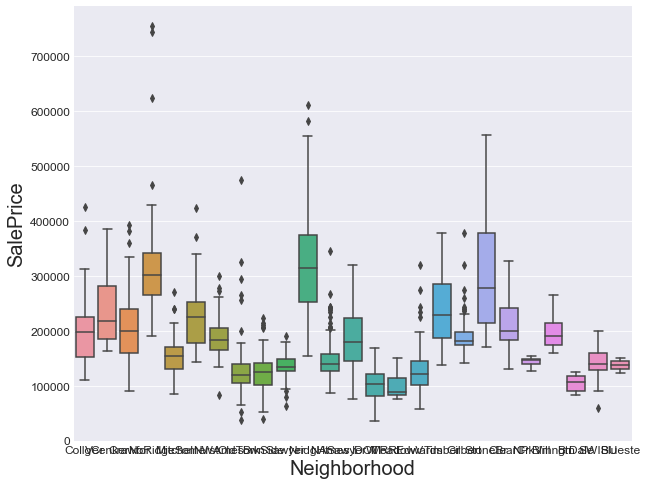

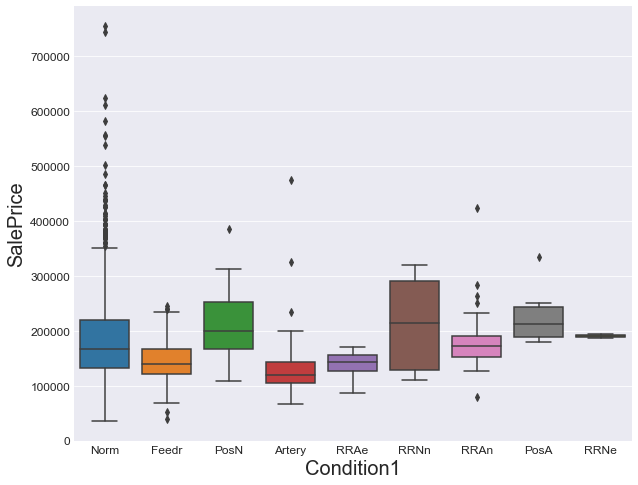

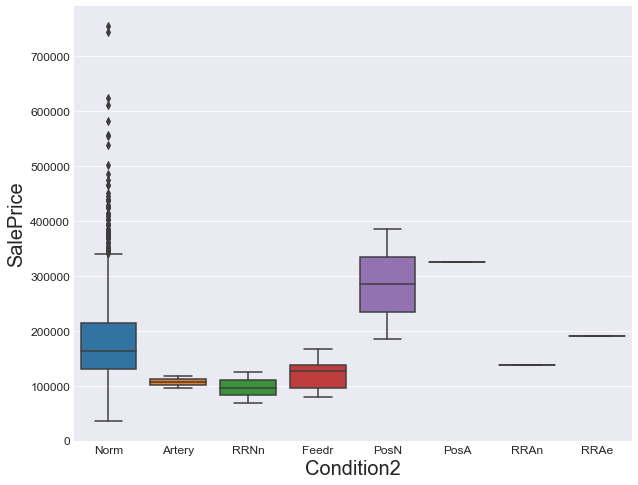

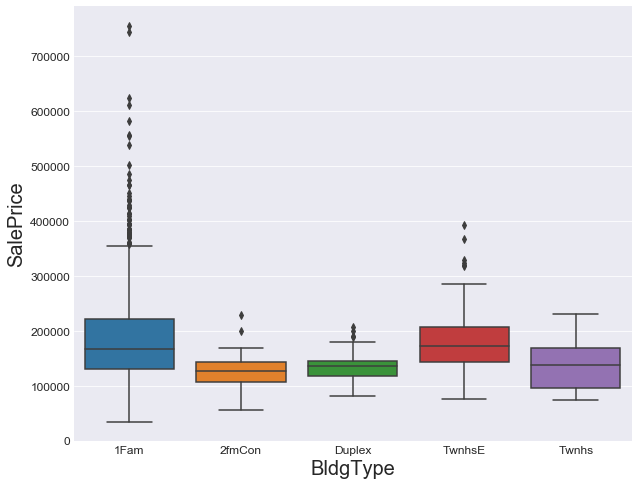

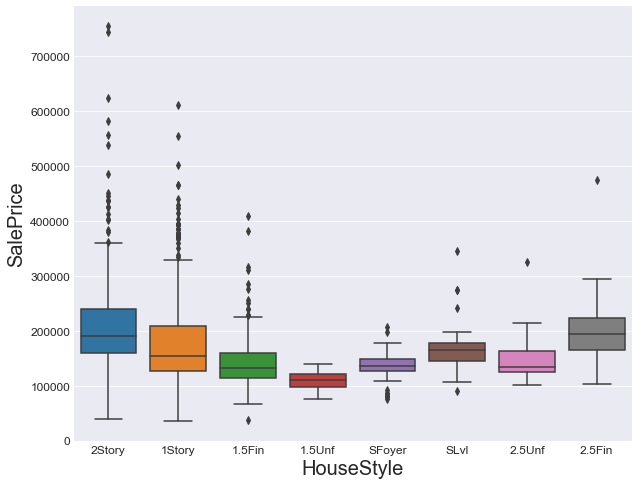

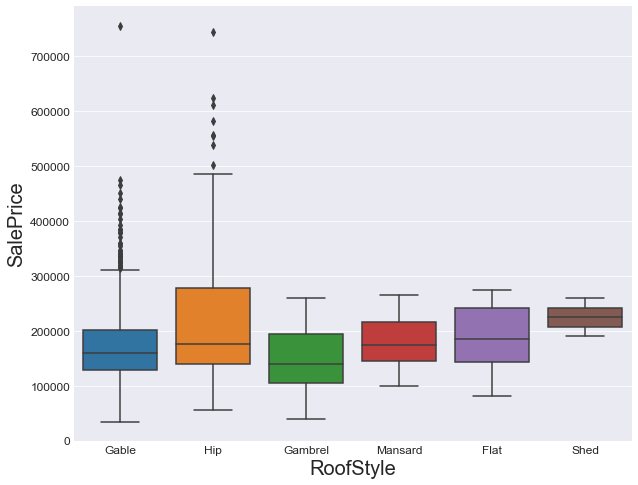

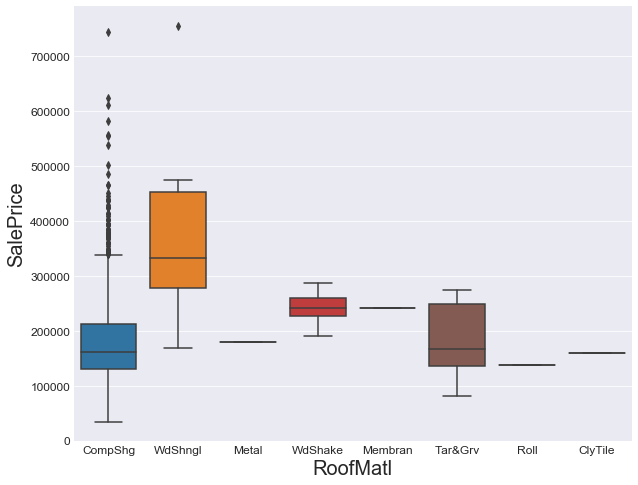

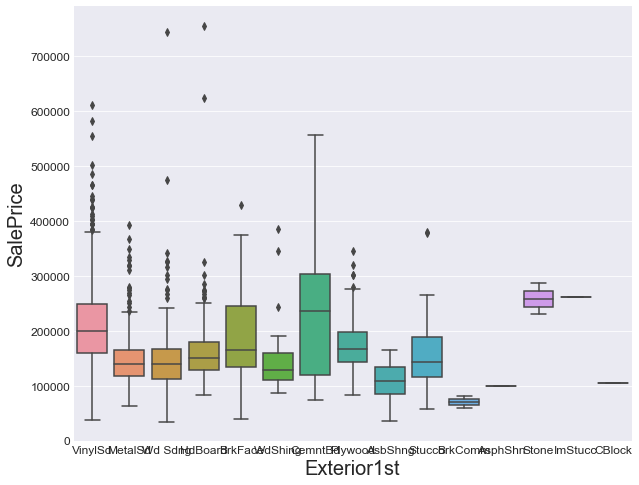

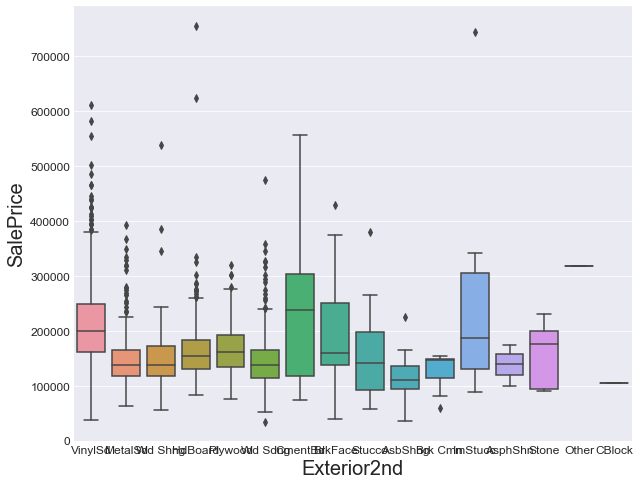

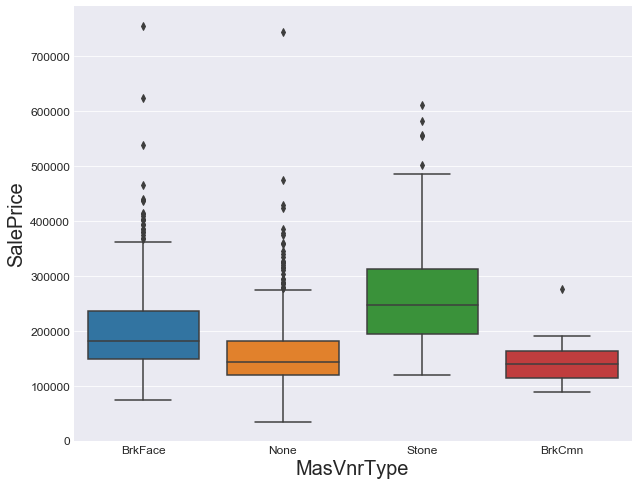

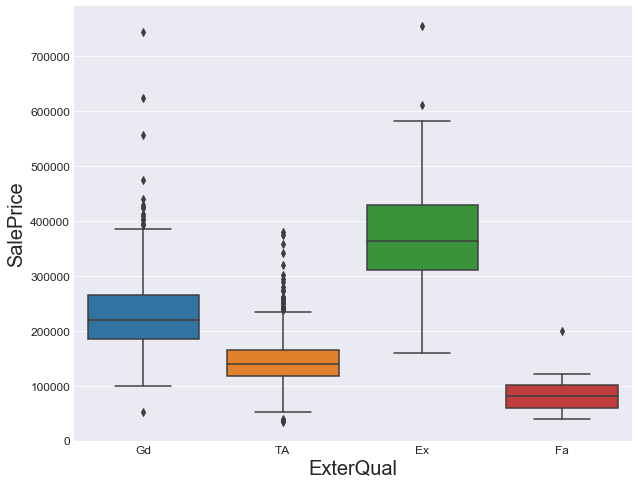

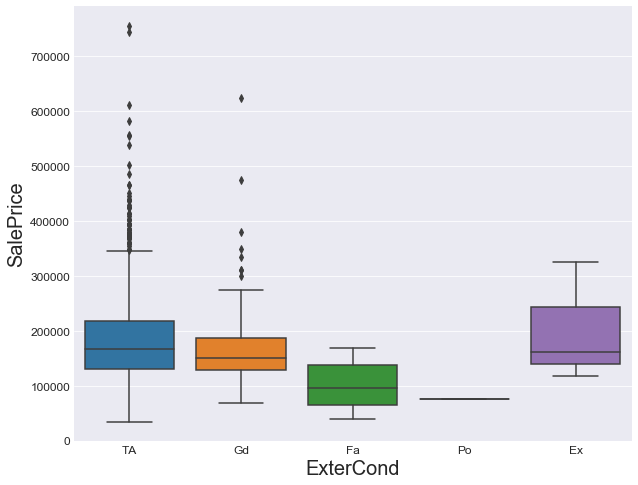

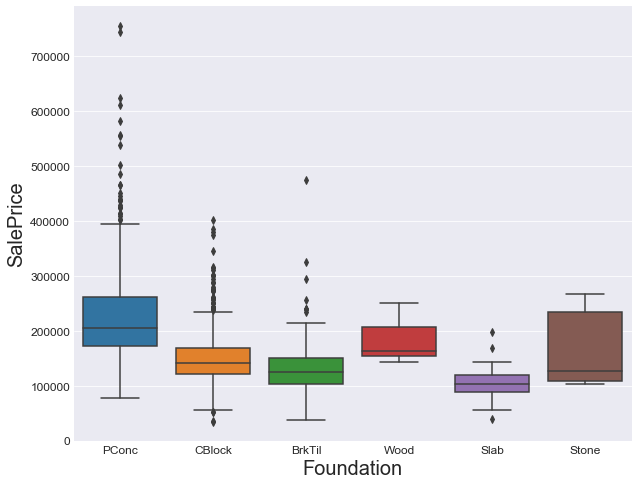

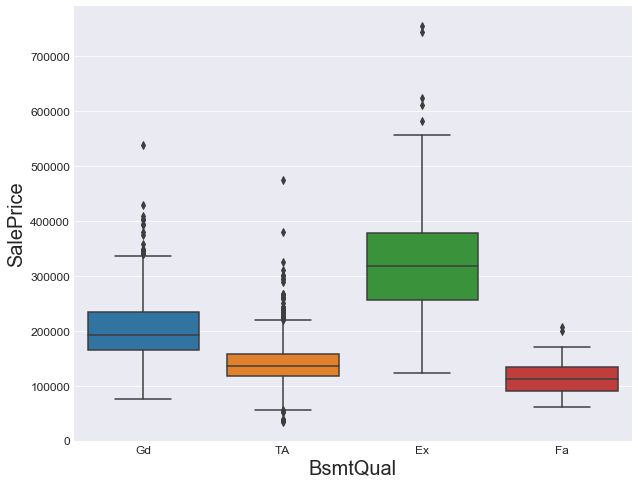

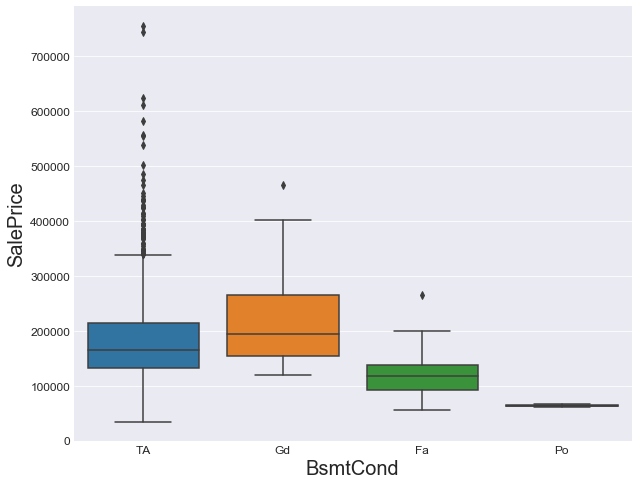

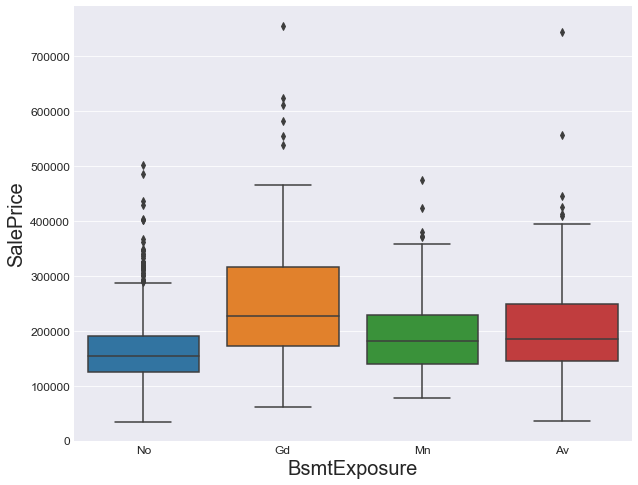

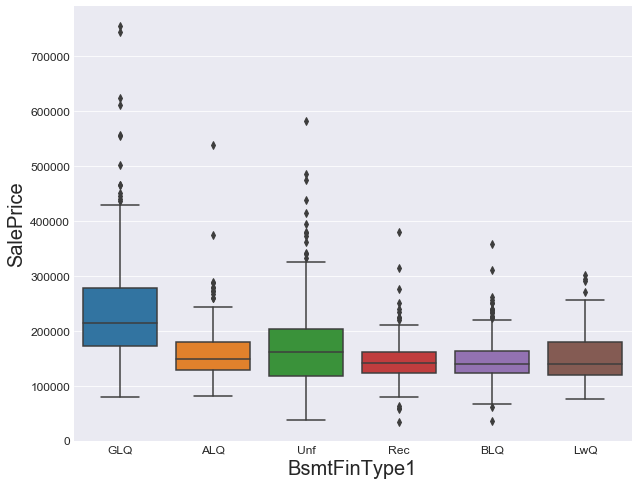

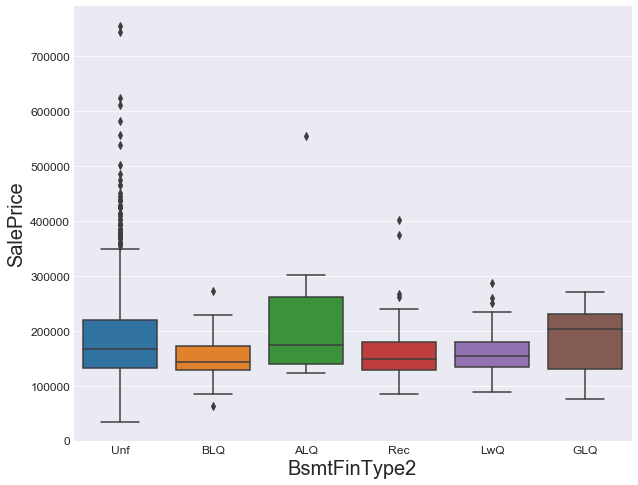

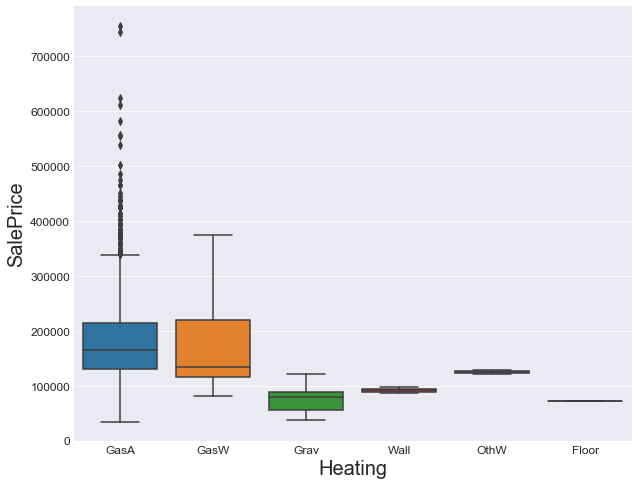

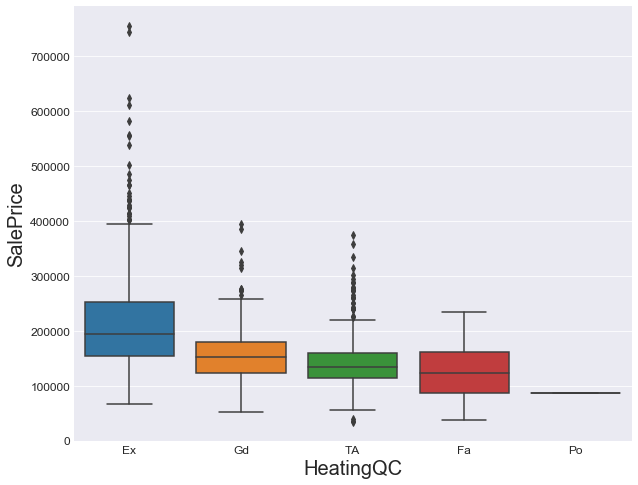

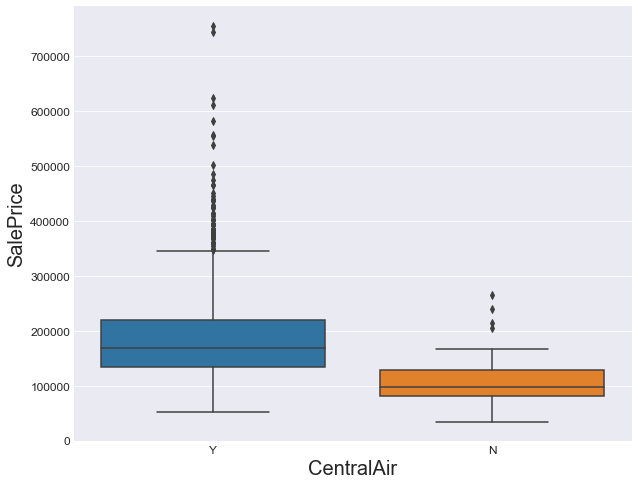

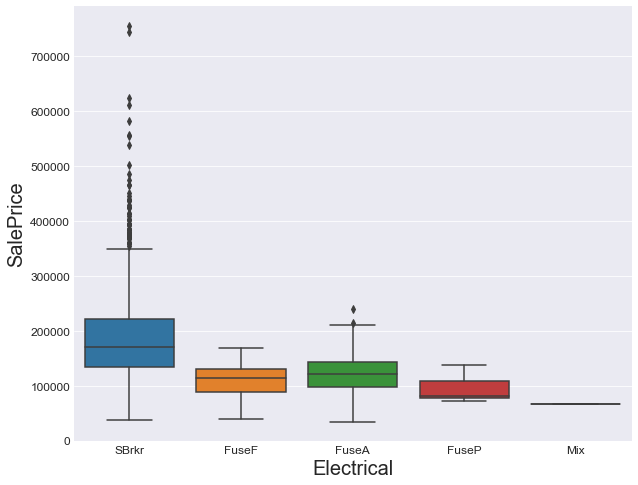

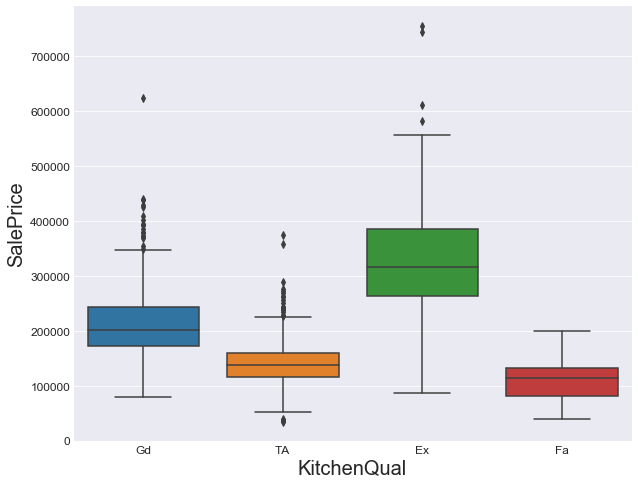

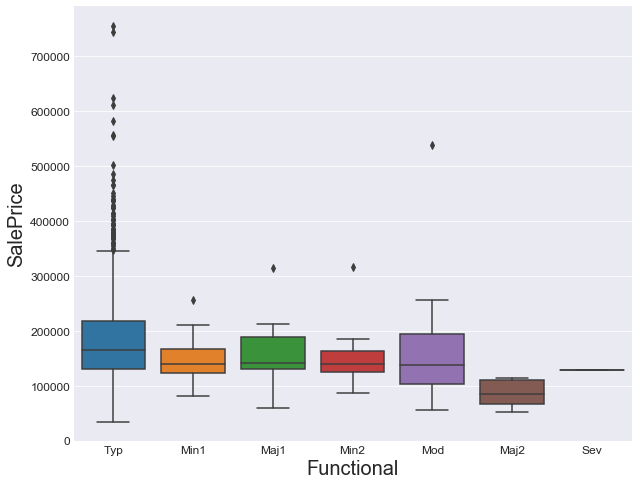

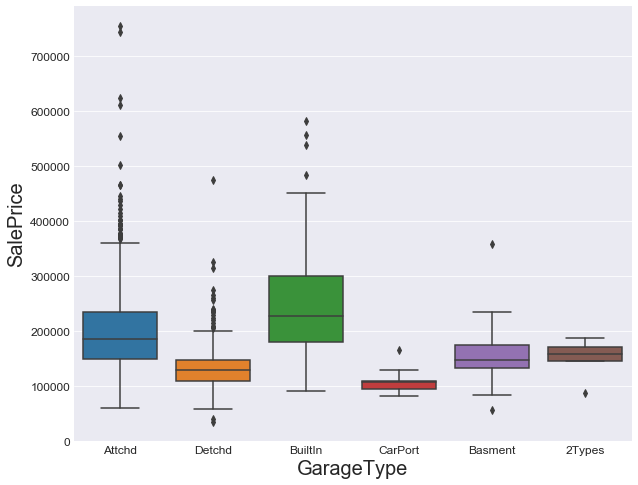

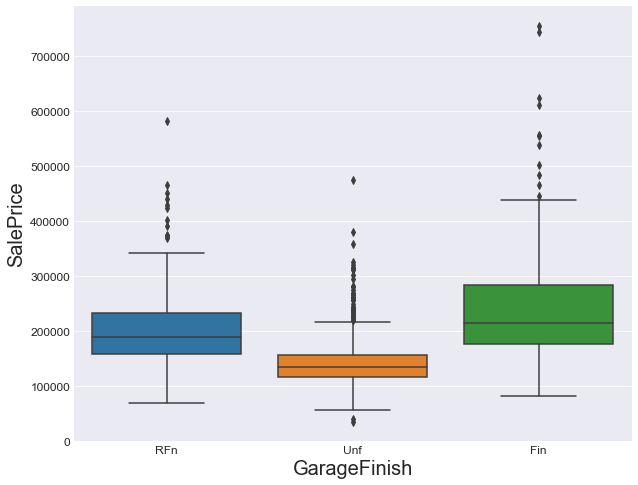

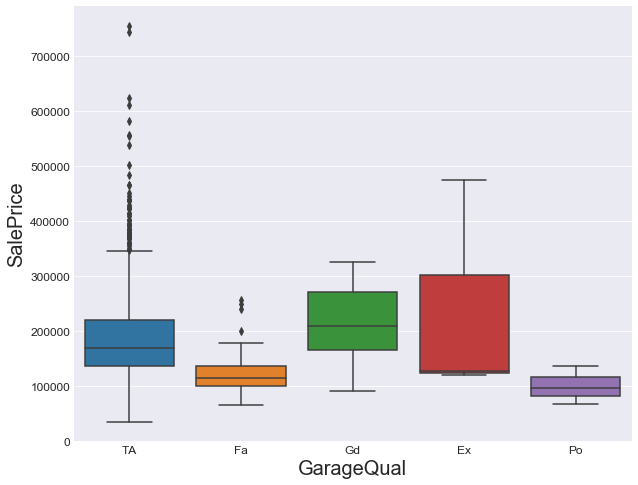

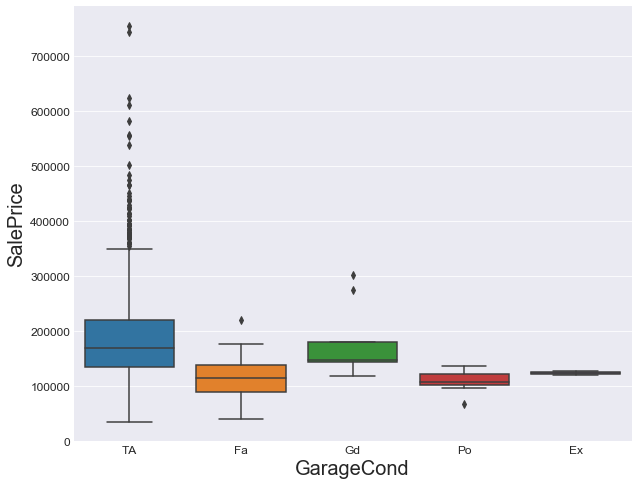

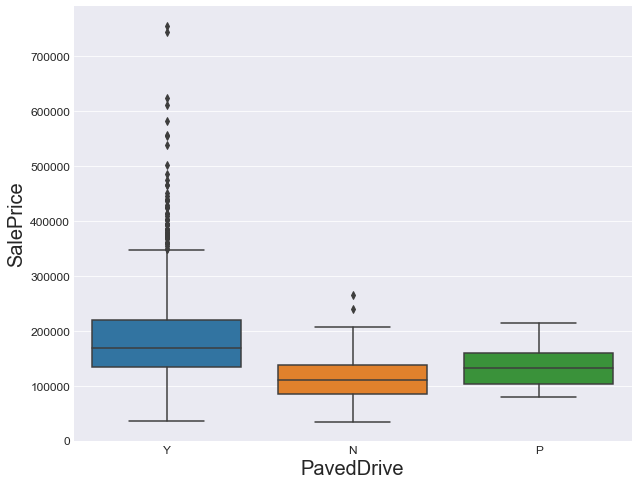

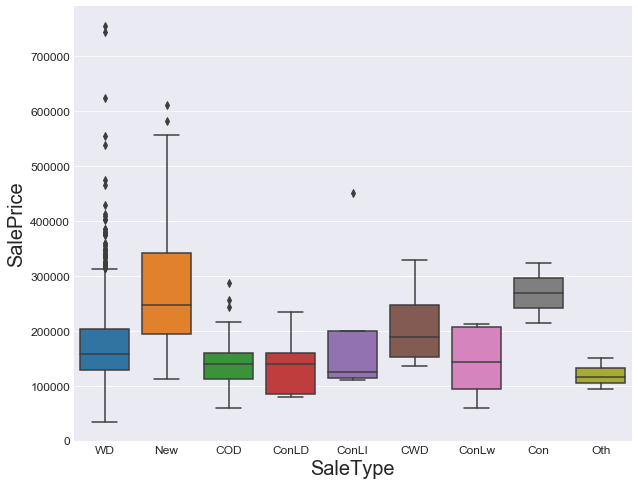

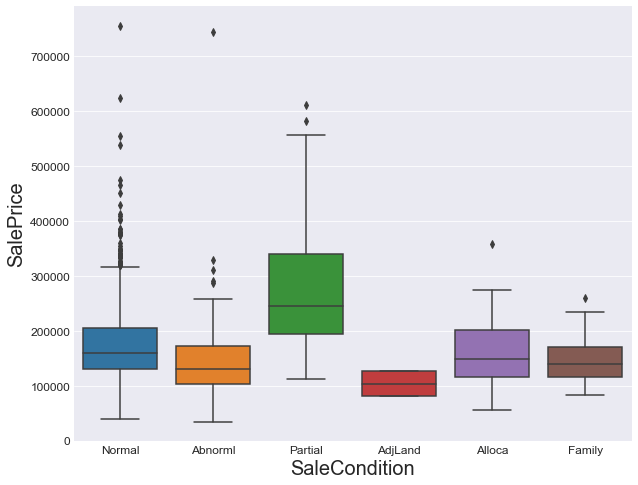

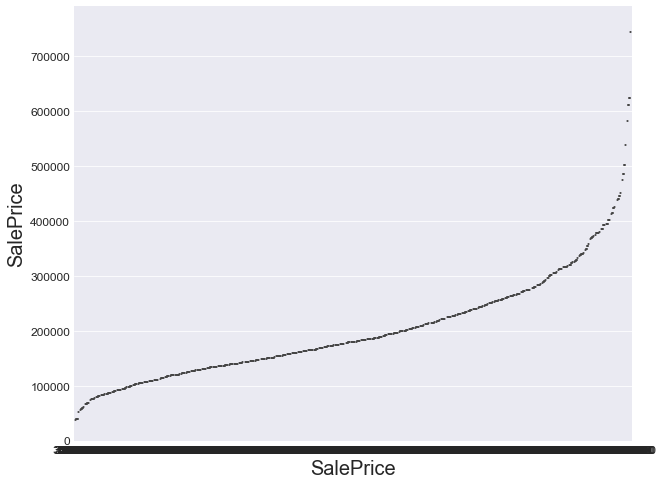

In [26]:
for col in col_cat:
    plot_box(df_clean[col_cat],"SalePrice",col)

In [27]:
#col_drop = ["Street","LotShape","LandContour","LotConfig","LandSlope","BldgType",
            #"RoofStyle","ExterCond","BsmtFinType1","BsmtFinType2","Functional","GarageCond","PavedDrive","log_sale"]

In [28]:
df_clean.loc[df_clean['flag'] == 'train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [29]:
#df_clean.drop(columns=col_drop, inplace=True)

In [30]:
col_dummie = ['MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition']

In [31]:
df_dummies = pd.get_dummies(df_clean[col_dummie])

In [32]:
df_clean.drop(columns=col_dummie, inplace=True)

In [33]:
df_model = pd.concat([df_clean,df_dummies],axis=1)

In [34]:
df_model.loc[df_model['flag']=="train"].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


## Modelos

In [35]:
def preenchimento(data):
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    return data

In [36]:
train = df_model.loc[df_model['flag']=="train"].drop(columns=(['flag'])).copy()
test = df_model.loc[df_model['flag']=="test"].drop(columns=(['flag'])).copy()

In [37]:
preenchimento(train)
preenchimento(test)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X = train.drop(['SalePrice','Id'], axis=1).copy()
y = np.log(train.SalePrice)
X_submit = test.drop(['SalePrice','Id'], axis=1).copy()
y_submit = test.Id

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
parameters = {'normalize': [False,True], 'fit_intercept': [False,True]} 
model = LinearRegression()

SEED = 1988
np.random.seed(SEED)
cv = KFold(10, shuffle=True)



clf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8)
clf.fit(X_train, y_train)
clf.best_params_
clf.predict(X_test)

r2 = r2_score(y_test, clf.predict(X_test))
results = cross_validate(model, X_test, y_test, cv=cv, return_train_score = False)
media = results['test_score'].mean()
desvio = results['test_score'].std()
mse = mean_squared_error((y_test), (clf.predict(X_test)))
erro = math.sqrt(mse)

print("LinearRegression")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'Mean: {media*100}')
print(f'Accuracy: [{(media-2*desvio)*100} , {(media+2*desvio)*100}]')
print(f'MSE = {erro} and R-square = {r2}')
print("------------------------------")

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done  34 out of  40 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    1.8s finished


LinearRegression
------------------------------
Parametros ótimos = {'fit_intercept': True, 'normalize': False}
Mean: 60.35678241594169
Accuracy: [-21.794434076377044 , 142.50799890826042]
MSE = 0.19610008023092731 and R-square = 0.7423141966409805
------------------------------


In [42]:
SEED = 1988
np.random.seed(SEED)
parameters = {'imputer__strategy':['median','mean'],   # <- you can cross validate the imputation method
              'regressor__max_depth': [3,5,10],
              'regressor__max_features': ['auto', 'sqrt', 'log2',10] ,
              'regressor__n_estimators' : [500,1000],
              'regressor__min_samples_leaf' : [10,20,50]
              } 
model = RandomForestRegressor()

SEED = 1988
np.random.seed(SEED)
cv = KFold(10, shuffle=True)

estimator =  Pipeline(steps=[('imputer', SimpleImputer()),
                             ('scaler', StandardScaler()),
                             ('regressor',  model)])

clf = GridSearchCV(estimator, parameters, cv=cv, verbose=5, n_jobs=-1,)
clf.fit(X_train, y_train)

r2 = r2_score(y_test, clf.predict(X_test))
mse = mean_squared_error((y_test), (clf.predict(X_test)))
erro = math.sqrt(mse)


print("RandomForest")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'MSE = {erro} and R-square = {r2}')
print("------------------------------")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.0min finished


RandomForest
------------------------------
Parametros ótimos = {'imputer__strategy': 'median', 'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 10, 'regressor__n_estimators': 1000}
MSE = 0.15234558753801203 and R-square = 0.8444769695613195
------------------------------


In [43]:
SEED = 1988
np.random.seed(SEED)


parameters = {'imputer__strategy':['median','mean'],   # <- you can cross validate the imputation method
              'regressor__max_depth': [3,5,10],
              'regressor__max_features': ['auto', 'sqrt', 'log2',10] ,
              'regressor__n_estimators' : [1000,2000,2400,3200],
              'regressor__min_samples_leaf' : [10,20,50]
              } 
model = GradientBoostingRegressor()

SEED = 1988
np.random.seed(SEED)
cv = KFold(10, shuffle=True)

estimator =  Pipeline(steps=[('imputer', SimpleImputer()),
                             ('scaler', StandardScaler()),
                             ('regressor',  model)])

clf = GridSearchCV(estimator, parameters, cv=cv, verbose=5, n_jobs=-1,)
clf.fit(X_train, y_train)

r2 = r2_score(y_test, clf.predict(X_test))
mse = mean_squared_error((y_test), (clf.predict(X_test)))
erro = math.sqrt(mse)

print("GradientBoosting")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'MSE = {erro} and R-square = {r2}')
print("------------------------------")

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 30.7min finished


GradientBoosting
------------------------------
Parametros ótimos = {'imputer__strategy': 'median', 'regressor__max_depth': 3, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 10, 'regressor__n_estimators': 1000}
MSE = 0.13008738510461523 and R-square = 0.8866020201038993
------------------------------


## Aplicação dos modelos

In [45]:
SEED = 1988
np.random.seed(SEED)
ln = LinearRegression(fit_intercept = False, normalize = False)
rf = RandomForestRegressor(max_depth = 40, max_features =  50, min_samples_leaf = 2 ,n_estimators = 2400)
gbm = GradientBoostingRegressor(max_depth = 5, max_features = 32, min_samples_leaf = 2, n_estimators = 2400)
np.random.seed(SEED)

ln.fit(X_train, y_train)
ln_y_pred = ln.predict(X_test)
ln_mse = mean_squared_error((y_test), (ln_y_pred))
ln_erro = math.sqrt(ln_mse)
r2_ln_pred = r2_score(y_test, ln_y_pred)
r2_ln_log = r2_score(np.log(y_test), np.log(ln_y_pred))

rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(np.log(y_test), np.log(rf_y_pred))
rf_erro = math.sqrt(rf_mse)
r2_rf_pred = r2_score(y_test, rf_y_pred)
r2_rf_log = r2_score(np.log(y_test), np.log(rf_y_pred))                     

gbm.fit(X_train, y_train)
gbm_y_pred = gbm.predict(X_test)
gbm_mse = mean_squared_error(np.log(y_test), np.log(gbm_y_pred))
gbm_erro = math.sqrt(gbm_mse)
r2_gbm_pred = r2_score(y_test, gbm_y_pred)
r2_gbm_log = r2_score(np.log(y_test), np.log(gbm_y_pred))

print("LinearRegression")
print("------------------------------")
print(f'MSE = {ln_erro} and R-square = {r2_ln_pred}, R-slog {r2_ln_log}')
print("------------------------------")
print("RandomForest")
print("------------------------------")
print(f'MSE = {rf_erro} and R-square = {r2_rf_pred}, R-slog {r2_rf_log}')
print("------------------------------")
print("GradientBoosting")
print("------------------------------")
print(f'MSE = {gbm_erro} and R-square = {r2_gbm_pred}, R-slog {r2_gbm_log}')
print("------------------------------")

LinearRegression
------------------------------
MSE = 0.19414738789431438 and R-square = 0.7474205264999945, R-slog 0.7677699826086019
------------------------------
RandomForest
------------------------------
MSE = 0.011782955628331267 and R-square = 0.8688190618522436, R-slog 0.8659741690828044
------------------------------
GradientBoosting
------------------------------
MSE = 0.010569844844203483 and R-square = 0.8951407470154363, R-slog 0.8921507203942465
------------------------------


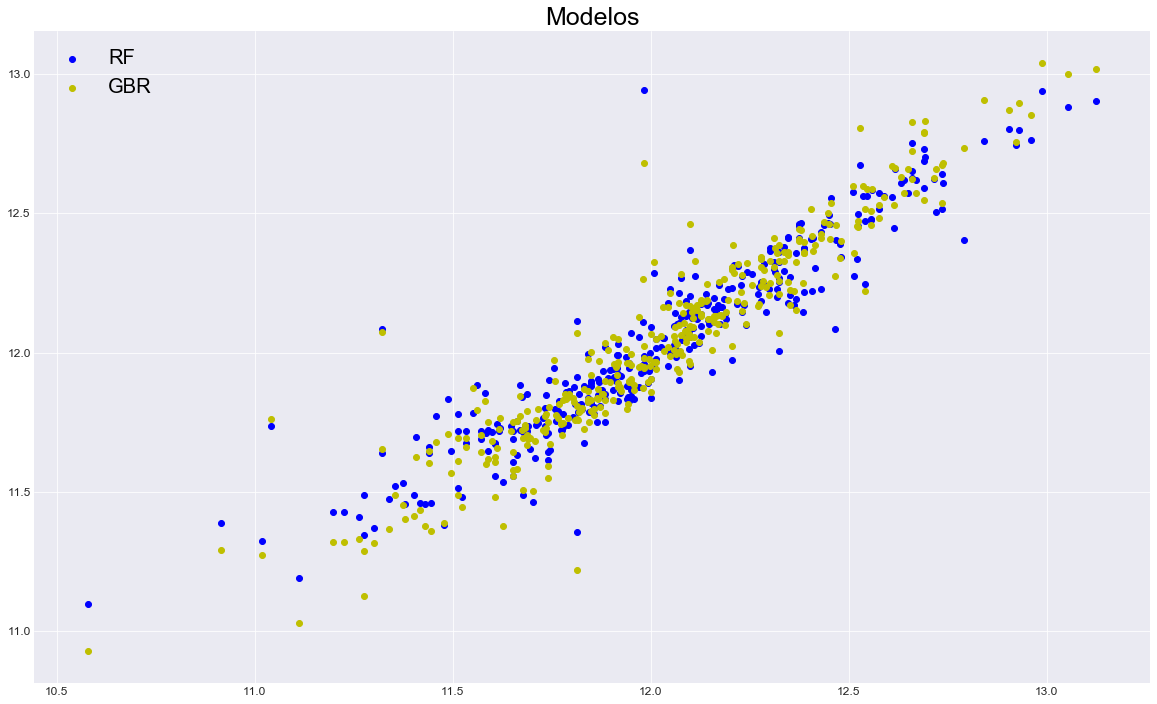

In [46]:
plt.figure(figsize = (20,12))
#plt.scatter(y_test,ln_y_pred,label='LR',marker = 'o',color='r')
plt.scatter(y_test,rf_y_pred,label='RF',marker = 'o',color='b')
plt.scatter(y_test,gbm_y_pred,label='GBR',marker = 'o',color='y')
plt.title('Modelos',fontsize = 25)
plt.legend(fontsize = 20)
plt.show()

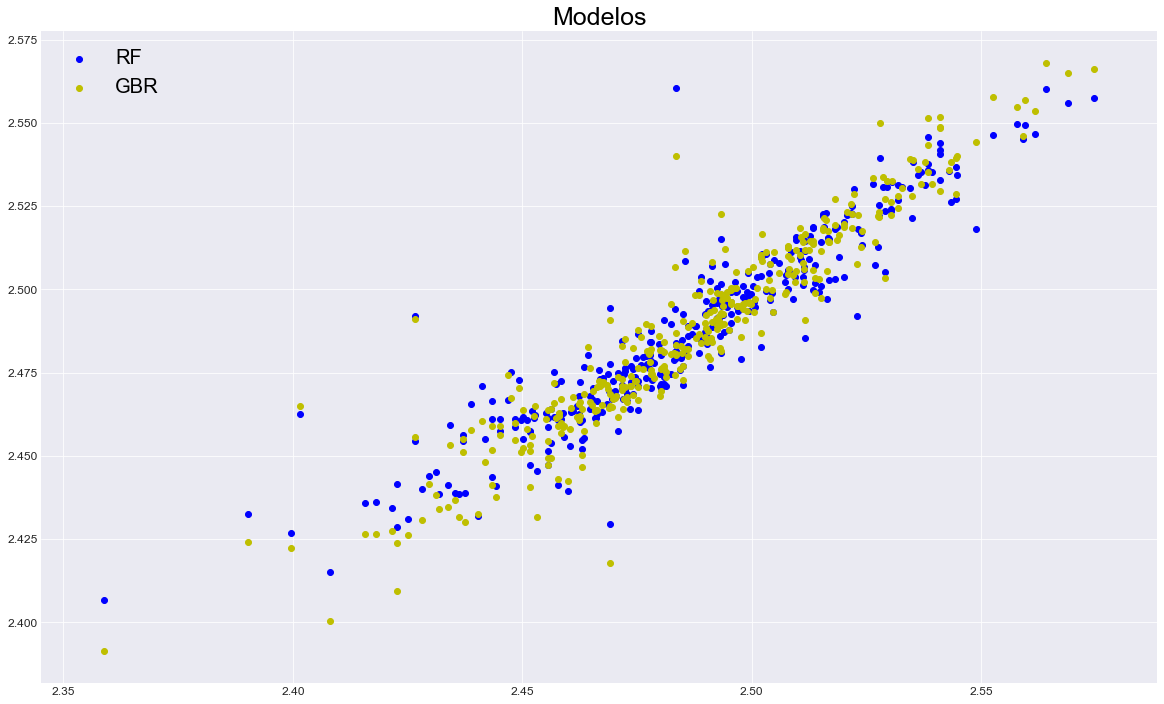

In [47]:
plt.figure(figsize = (20,12))
#plt.scatter(np.log(y_test),np.log(ln_y_pred),label='LR',marker = 'o',color='r')
plt.scatter(np.log(y_test),np.log(rf_y_pred),label='RF',marker = 'o',color='b')
plt.scatter(np.log(y_test),np.log(gbm_y_pred),label='GBR',marker = 'o',color='y')
plt.title('Modelos',fontsize = 25)
plt.legend(fontsize = 20)
plt.show()

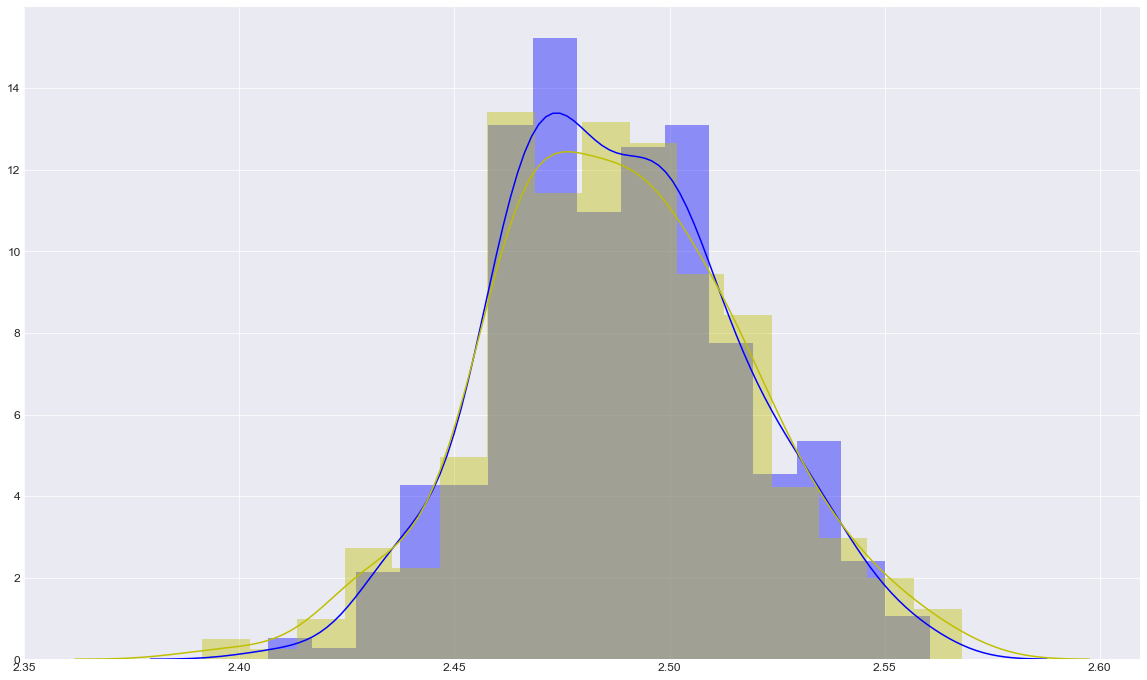

In [48]:
plt.figure(figsize = (20,12))
#sns.distplot(np.log(ln_y_pred),color='r')
sns.distplot(np.log(rf_y_pred),color='b')
sns.distplot(np.log(gbm_y_pred),color='y')

plt.show()

## Predição e submissão

In [51]:
y_resp = gbm.predict(X_submit)
submission = pd.concat([pd.DataFrame(y_submit),pd.DataFrame(np.exp(y_resp))], axis=1)
submission.rename(columns={0:'SalePrice'},inplace=True)
submission

,Id,SalePrice
0,1461,124616.438637
1,1462,155539.317592
2,1463,187240.393252
3,1464,200061.226441
4,1465,176493.309847
...,...,...
1454,2915,80227.570629
1455,2916,79040.631221
1456,2917,152485.501946
1457,2918,118689.202285


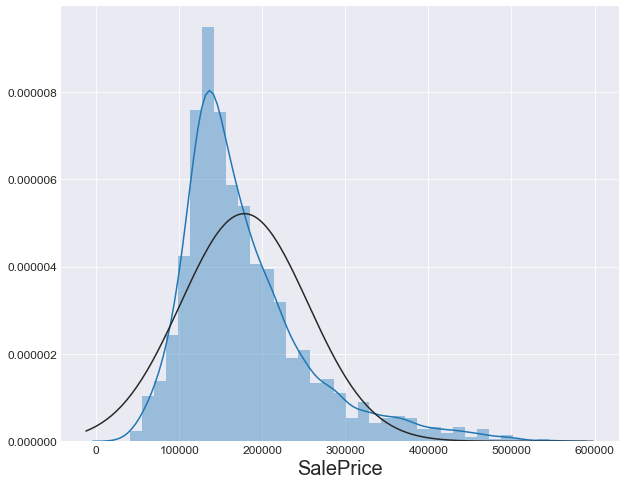

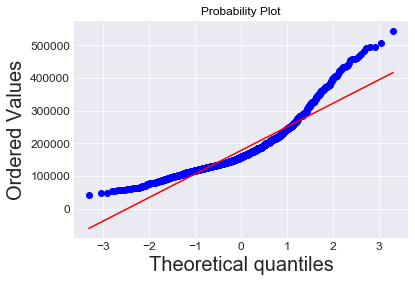

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(submission.SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(submission.SalePrice, plot=plt)

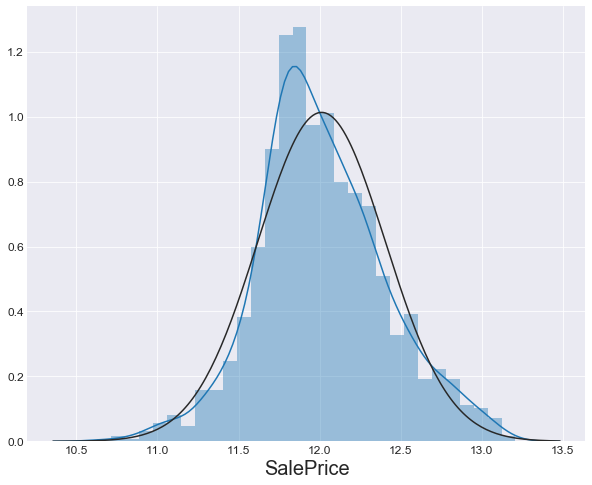

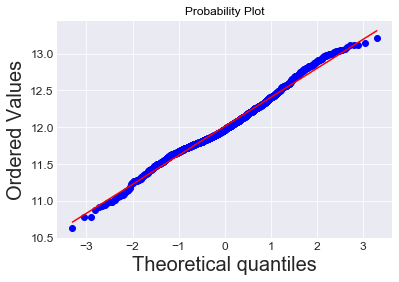

In [53]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(submission.SalePrice), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(submission.SalePrice), plot=plt)

# Ensinos do Kaggle

In [54]:
submission.to_csv("submission.csv")